## Kuka Youbot Kinematics

### Import Libraries

In [1]:
import numpy as np
from sympy import*
init_printing()

### Definition of symbolic variables

In [2]:
theta_1 = symbols("theta_1",  real=True)
alpha_1 = symbols("alpha_1",  real=True)
d_1 = symbols("d_1",  real=True)
a_1 = symbols("a_1",  real=True)


In [3]:
def denavit(a, alpha, d, theta):
    # Formulate Denavit Matrix
    A =  Matrix([[cos(theta), -cos(alpha)*sin(theta), sin(alpha)*sin(theta), a*cos(theta)],
                 [sin(theta), cos(alpha)*cos(theta), -sin(alpha)*cos(theta), a*sin(theta)],
                 [0, sin(alpha), cos(alpha), d],
                 [0, 0, 0, 1]])
    return A

In [4]:
## Check Matrices
A = denavit(a_1, alpha_1, d_1, theta_1)

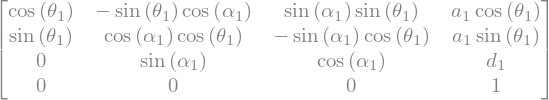

In [5]:
A

### Denavit hartenberg

### base displacement

In [6]:
a_0 = symbols("a_0", real = True)
d_0 = 0.0
alpha_0 = 0.0
theta_0 = 0.0
H01 = denavit(a_0, alpha_0, d_0, theta_0)


In [7]:
print_latex(H01)

\left[\begin{matrix}1 & 0 & 0 & a_{0}\\0 & 1 & 0 & 0\\0 & 0 & 1 & 0\\0 & 0 & 0 & 1\end{matrix}\right]


### Joint 1

In [8]:
a_1 = symbols("a_1",  real=True)
d_1 = symbols("d_1",  real=True)
alpha_1 = pi/2
theta_1 = symbols("theta_1",  real=True)

In [9]:
H12 = denavit(a_1, alpha_1, d_1, theta_1)

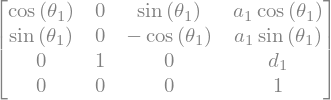

In [10]:
H12

In [11]:
print_latex(H12)

\left[\begin{matrix}\cos{\left(\theta_{1} \right)} & 0 & \sin{\left(\theta_{1} \right)} & a_{1} \cos{\left(\theta_{1} \right)}\\\sin{\left(\theta_{1} \right)} & 0 & - \cos{\left(\theta_{1} \right)} & a_{1} \sin{\left(\theta_{1} \right)}\\0 & 1 & 0 & d_{1}\\0 & 0 & 0 & 1\end{matrix}\right]


### Joint 2

In [12]:
a_2 = symbols("a_2",  real=True)
d_2 = 0
alpha_2 = 0
theta_2 = symbols("theta_2",  real=True)
theta_2 = theta_2

In [13]:
H23 = denavit(a_2, alpha_2, d_2, theta_2 + pi/2)

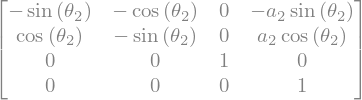

In [14]:
H23

In [15]:
print_latex(H23)

\left[\begin{matrix}- \sin{\left(\theta_{2} \right)} & - \cos{\left(\theta_{2} \right)} & 0 & - a_{2} \sin{\left(\theta_{2} \right)}\\\cos{\left(\theta_{2} \right)} & - \sin{\left(\theta_{2} \right)} & 0 & a_{2} \cos{\left(\theta_{2} \right)}\\0 & 0 & 1 & 0\\0 & 0 & 0 & 1\end{matrix}\right]


### Joint 3

In [16]:
a_3 = symbols("a_3",  real=True)
d_3 = 0
alpha_3 = 0
theta_3 = symbols("theta_3",  real=True)

In [17]:
H34 = denavit(a_3, alpha_3, d_3, theta_3)

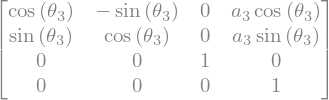

In [18]:
H34

In [19]:
print_latex(H34)

\left[\begin{matrix}\cos{\left(\theta_{3} \right)} & - \sin{\left(\theta_{3} \right)} & 0 & a_{3} \cos{\left(\theta_{3} \right)}\\\sin{\left(\theta_{3} \right)} & \cos{\left(\theta_{3} \right)} & 0 & a_{3} \sin{\left(\theta_{3} \right)}\\0 & 0 & 1 & 0\\0 & 0 & 0 & 1\end{matrix}\right]


### Joint 4

In [20]:
a_4 = symbols("a_4",  real=True)
d_4 = 0.0
alpha_4 = 0.0
theta_4 = symbols("theta_4",  real=True)

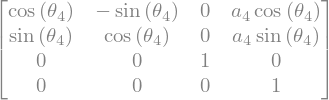

In [21]:
H45 = denavit(a_4, alpha_4, d_4, theta_4)
H45

In [22]:
print_latex(H45)

\left[\begin{matrix}\cos{\left(\theta_{4} \right)} & - \sin{\left(\theta_{4} \right)} & 0 & a_{4} \cos{\left(\theta_{4} \right)}\\\sin{\left(\theta_{4} \right)} & \cos{\left(\theta_{4} \right)} & 0 & a_{4} \sin{\left(\theta_{4} \right)}\\0 & 0 & 1 & 0\\0 & 0 & 0 & 1\end{matrix}\right]


### Forward Kinematics

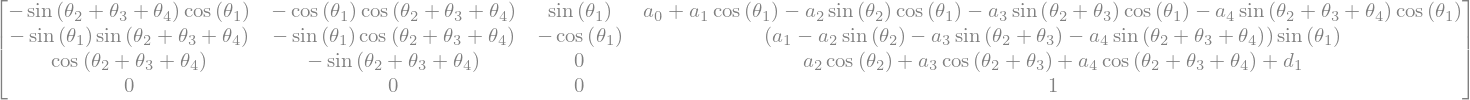

In [23]:
T = simplify(H01@H12@H23@H34@H45)
T

In [24]:
print_latex(T)

\left[\begin{matrix}- \sin{\left(\theta_{2} + \theta_{3} + \theta_{4} \right)} \cos{\left(\theta_{1} \right)} & - \cos{\left(\theta_{1} \right)} \cos{\left(\theta_{2} + \theta_{3} + \theta_{4} \right)} & \sin{\left(\theta_{1} \right)} & a_{0} + a_{1} \cos{\left(\theta_{1} \right)} - a_{2} \sin{\left(\theta_{2} \right)} \cos{\left(\theta_{1} \right)} - a_{3} \sin{\left(\theta_{2} + \theta_{3} \right)} \cos{\left(\theta_{1} \right)} - a_{4} \sin{\left(\theta_{2} + \theta_{3} + \theta_{4} \right)} \cos{\left(\theta_{1} \right)}\\- \sin{\left(\theta_{1} \right)} \sin{\left(\theta_{2} + \theta_{3} + \theta_{4} \right)} & - \sin{\left(\theta_{1} \right)} \cos{\left(\theta_{2} + \theta_{3} + \theta_{4} \right)} & - \cos{\left(\theta_{1} \right)} & \left(a_{1} - a_{2} \sin{\left(\theta_{2} \right)} - a_{3} \sin{\left(\theta_{2} + \theta_{3} \right)} - a_{4} \sin{\left(\theta_{2} + \theta_{3} + \theta_{4} \right)}\right) \sin{\left(\theta_{1} \right)}\\\cos{\left(\theta_{2} + \theta_{3} + \thet

In [25]:
P = T[0:3, 3]
Px = T[0, 3]

In [27]:
print_latex(P)

\left[\begin{matrix}a_{0} + a_{1} \cos{\left(\theta_{1} \right)} - a_{2} \sin{\left(\theta_{2} \right)} \cos{\left(\theta_{1} \right)} - a_{3} \sin{\left(\theta_{2} + \theta_{3} \right)} \cos{\left(\theta_{1} \right)} - a_{4} \sin{\left(\theta_{2} + \theta_{3} + \theta_{4} \right)} \cos{\left(\theta_{1} \right)}\\\left(a_{1} - a_{2} \sin{\left(\theta_{2} \right)} - a_{3} \sin{\left(\theta_{2} + \theta_{3} \right)} - a_{4} \sin{\left(\theta_{2} + \theta_{3} + \theta_{4} \right)}\right) \sin{\left(\theta_{1} \right)}\\a_{2} \cos{\left(\theta_{2} \right)} + a_{3} \cos{\left(\theta_{2} + \theta_{3} \right)} + a_{4} \cos{\left(\theta_{2} + \theta_{3} + \theta_{4} \right)} + d_{1}\end{matrix}\right]


In [26]:
dp = P.jacobian([theta_1, theta_2, theta_3, theta_4])

### Latex print

In [28]:
print_latex(dp)

\left[\begin{matrix}- a_{1} \sin{\left(\theta_{1} \right)} + a_{2} \sin{\left(\theta_{1} \right)} \sin{\left(\theta_{2} \right)} + a_{3} \sin{\left(\theta_{1} \right)} \sin{\left(\theta_{2} + \theta_{3} \right)} + a_{4} \sin{\left(\theta_{1} \right)} \sin{\left(\theta_{2} + \theta_{3} + \theta_{4} \right)} & - a_{2} \cos{\left(\theta_{1} \right)} \cos{\left(\theta_{2} \right)} - a_{3} \cos{\left(\theta_{1} \right)} \cos{\left(\theta_{2} + \theta_{3} \right)} - a_{4} \cos{\left(\theta_{1} \right)} \cos{\left(\theta_{2} + \theta_{3} + \theta_{4} \right)} & - a_{3} \cos{\left(\theta_{1} \right)} \cos{\left(\theta_{2} + \theta_{3} \right)} - a_{4} \cos{\left(\theta_{1} \right)} \cos{\left(\theta_{2} + \theta_{3} + \theta_{4} \right)} & - a_{4} \cos{\left(\theta_{1} \right)} \cos{\left(\theta_{2} + \theta_{3} + \theta_{4} \right)}\\\left(a_{1} - a_{2} \sin{\left(\theta_{2} \right)} - a_{3} \sin{\left(\theta_{2} + \theta_{3} \right)} - a_{4} \sin{\left(\theta_{2} + \theta_{3} + \theta_{4} \r